<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-#A" data-toc-modified-id="Problem-#A-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem #A: Exploratory Data Analysis Using Correlation and Principal Components for Student Scores</a></span></li><li><span><a href="#Problem-#B" data-toc-modified-id="Problem-#B-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem #B: Regression Analysis for Student Scores

# Problem #A

In [12]:
#A-1: Understanding the Given Data:
import pandas as pd
import numpy as np
df = pd.read_csv('StudentScoresDataA.csv', delimiter =',')
display(df)


# Count the number of rows and columns in the data
print(f'The number of rows are {len(df.index)}, and the number of columns are {len(df.columns)}')
# Count the number of non-null rows for each column
print(f'The number of non-null rows for each column are:\n{df.count()}')
null =df.columns[df.isna().any()]
print(f'The columns containing missing data are:\n{null}') # No columns containing missing data
display(df.describe(include="number"))# only numerical
display(df.describe(include="object")) # only categorical

,Gender,Location,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
0,Male,Jeddah,17,17,24,16,100,92,85,86
1,Female,Jeddah,10,21,14,8,16,28,17,25
2,Female,Jeddah,7,21,23,7,55,45,41,43
3,Male,Dammam,22,10,21,12,80,70,67,68
4,Female,Dammam,21,15,17,18,81,79,78,81
...,...,...,...,...,...,...,...,...,...,...
3495,Female,Riyadh,15,25,20,15,87,93,89,81
3496,Male,Dammam,15,14,17,8,48,45,46,43
3497,Male,Riyadh,20,23,20,18,71,77,82,73
3498,Female,Riyadh,10,16,6,12,63,68,49,60


The number of rows are 3500, and the number of columns are 10
The number of non-null rows for each column are:
Gender      3500
Location    3500
Quiz-1      3500
Quiz-2      3500
Quiz-3      3500
Quiz-4      3500
Major-1     3500
Major-2     3500
Major-3     3500
Final       3500
dtype: int64
The columns containing missing data are:
Index([], dtype='object')


,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,12.414571,14.814857,14.924286,12.523714,55.954571,55.949143,56.154286,54.019714
std,5.618516,6.001572,6.094121,5.612041,21.552887,21.734182,21.803054,21.418980
min,0.000000,5.000000,5.000000,0.000000,12.000000,12.000000,12.000000,8.000000
25%,8.000000,10.000000,10.000000,8.000000,38.000000,38.000000,38.000000,36.000000
50%,12.000000,15.000000,15.000000,13.000000,56.000000,56.000000,56.000000,54.000000
75%,17.000000,20.000000,20.000000,17.000000,74.000000,74.000000,74.000000,72.000000
max,25.000000,25.000000,25.000000,25.000000,100.000000,100.000000,100.000000,100.000000


,Gender,Location
count,3500,3500
unique,2,7
top,Male,Madinah
freq,1756,519


In [13]:
#A-2: Check for Type Consistency
df.info()
print('''As can be seen from the data above and the info below:
gender is object Dtype as it should be.
Location is object Dtype as it should be.
Quiz-1 is numerical as it should be.
Quiz-2 is numerical as it should be.
Quiz-3 is numerical as it should be.
Quiz-4 is numerical as it should be. 
Major-1 is numerical as it should be. 
Major-2 is numerical as it should be. 
Major-3 is numerical as it should be. 
Final is numerical as it should be.''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Gender    3500 non-null   object
 1   Location  3500 non-null   object
 2   Quiz-1    3500 non-null   int64 
 3   Quiz-2    3500 non-null   int64 
 4   Quiz-3    3500 non-null   int64 
 5   Quiz-4    3500 non-null   int64 
 6   Major-1   3500 non-null   int64 
 7   Major-2   3500 non-null   int64 
 8   Major-3   3500 non-null   int64 
 9   Final     3500 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 273.6+ KB
As can be seen from the data above and the info below:
gender is object Dtype as it should be.
Location is object Dtype as it should be.
Quiz-1 is numerical as it should be.
Quiz-2 is numerical as it should be.
Quiz-3 is numerical as it should be.
Quiz-4 is numerical as it should be. 
Major-1 is numerical as it should be. 
Major-2 is numerical as it should be. 
Major-3 is numerical 

In [14]:
#A-3: Normalization: normalizae the data such that the mean is zero and standard deviation is one.
from sklearn.preprocessing import StandardScaler # import
selected_columns = df.select_dtypes(include="number").columns
for c in selected_columns:
    scaler = StandardScaler() # creating object
    scaler.fit(df[[c]]) # fitting
    df[c]= scaler.transform(df[[c]]) #transforming
    print(f'The mean and std values for {c} are', abs(np.round(df[c].mean())), ' and ', np.round(df[c].std()))
display(df)

The mean and std values for Quiz-1 are 0.0  and  1.0
The mean and std values for Quiz-2 are 0.0  and  1.0
The mean and std values for Quiz-3 are 0.0  and  1.0
The mean and std values for Quiz-4 are 0.0  and  1.0
The mean and std values for Major-1 are 0.0  and  1.0
The mean and std values for Major-2 are 0.0  and  1.0
The mean and std values for Major-3 are 0.0  and  1.0
The mean and std values for Final are 0.0  and  1.0


,Gender,Location,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
0,Male,Jeddah,0.816245,0.364147,1.489470,0.619522,2.043890,1.658954,1.323202,1.493295
1,Female,Jeddah,-0.429814,1.030734,-0.151690,-0.806188,-1.854057,-1.286137,-1.796073,-1.355053
2,Female,Jeddah,-0.963839,1.030734,1.325354,-0.984402,-0.044296,-0.503847,-0.695153,-0.514557
3,Male,Dammam,1.706287,-0.802381,0.997122,-0.093333,1.115807,0.646579,0.497511,0.652799
4,Female,Dammam,1.528278,0.030853,0.340658,0.975949,1.162211,1.060732,1.002100,1.259824
...,...,...,...,...,...,...,...,...,...,...
3495,Female,Riyadh,0.460228,1.697322,0.833006,0.441308,1.440636,1.704971,1.506688,1.259824
3496,Male,Dammam,0.460228,-0.135793,0.340658,-0.806188,-0.369125,-0.503847,-0.465794,-0.514557
3497,Male,Riyadh,1.350270,1.364028,0.833006,0.975949,0.698170,0.968698,1.185587,0.886270
3498,Female,Riyadh,-0.429814,0.197500,-1.464618,-0.093333,0.326937,0.554545,-0.328179,0.279245


<Figure size 432x288 with 0 Axes>

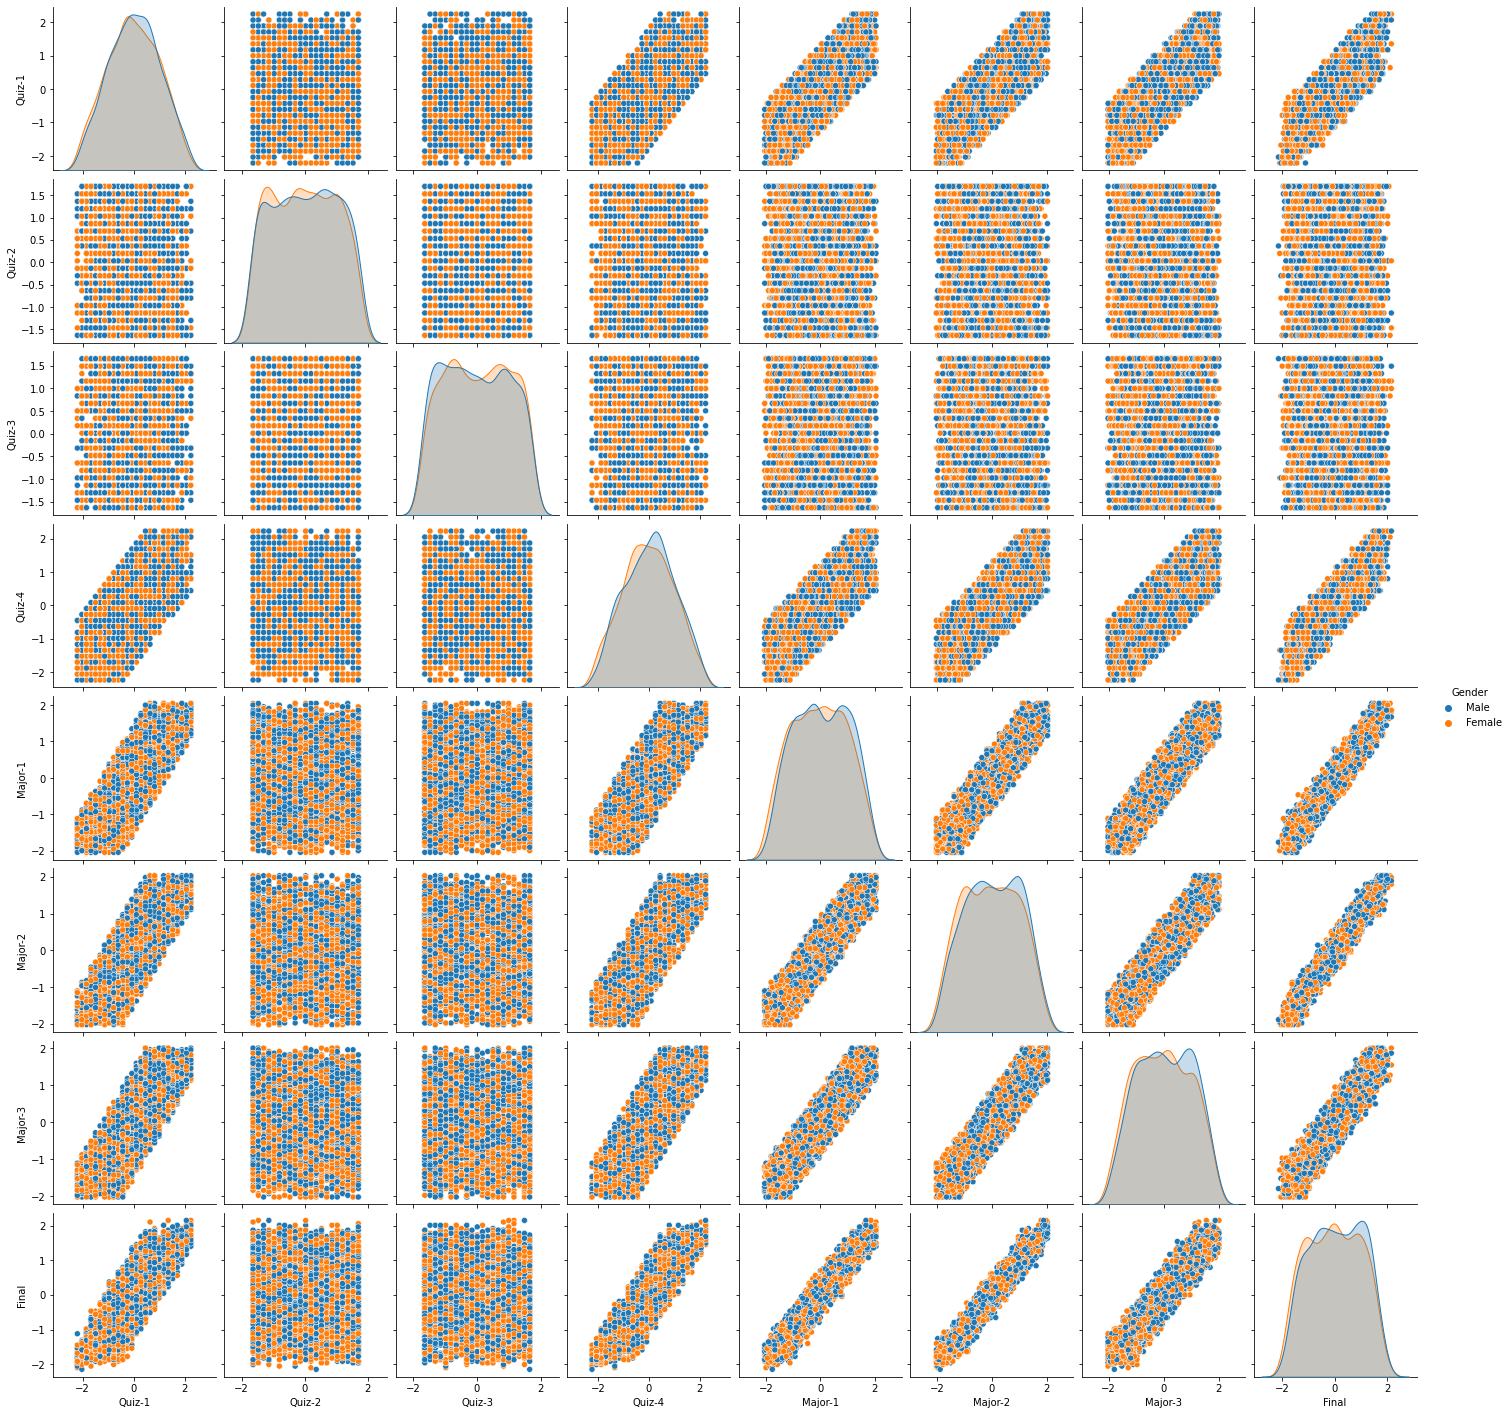

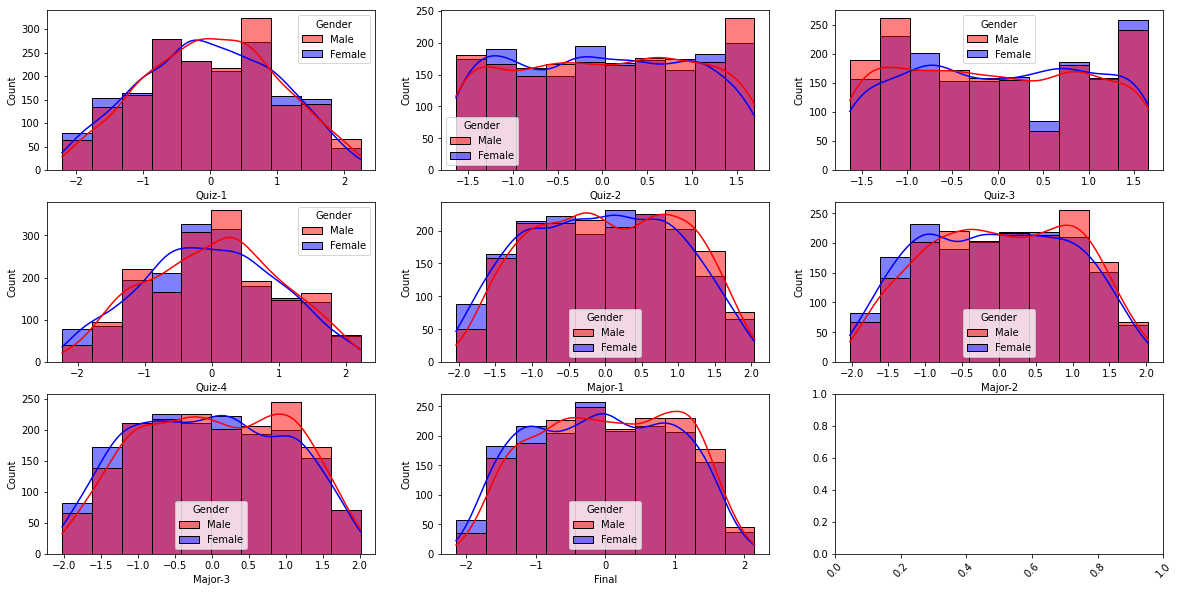

In [15]:
#A-4: Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.pairplot(vars=selected_columns,kind="scatter",hue ='Gender',data=df)#pairwise scatter plot for each numerical pair
plt.show()
#-----
plt.figure
nCols=3   # How many columns wanted
nRows=len(selected_columns)//nCols+1
fig,axes = plt.subplots(nRows, nCols, figsize=(20,10)) 

for ind,col in enumerate(selected_columns): #each numerical column  (تاكد)
    sns.histplot(x=col,bins=10,ax = axes.flatten()[ind],hue ='Gender',kde=True,palette=['r','b'],data=df) 
    plt.xticks(rotation=45)
plt.show()

In [16]:
#A-5: Correlation Analysis
corr = df.corr()
display(corr.style.background_gradient(cmap='coolwarm').set_precision(4))

corr=corr.apply(lambda x: np.abs(x)) # negative correlation will be considered
sorted_corr = corr.sort_values(by=['Final'], ascending=False)#sort by : to get what variables are correlated with Final
sorted_corr = sorted_corr['Final'].index # store the indecies here to access them next
print('The top three correlated input variables are: ',sorted_corr[1:4].tolist())# discarding 0 (Final vs. Final = 1)

#Which pair of score columns are strongly correlated?
# Quiz-1 is highly correlated with (Quiz-4, Major-1, Major-2, Major-3)
# Quiz-4 is highly correlated with (Quiz-1, Major-1, Major-2, Major-3)
# Major-1 is highly correlated with (Quiz-1, Quiz-4, Major-2, Major-3)
# Major-2 is highly correlated with (Quiz-1, Quiz-4, Major-1, Major-3)
# Major-3 is highly correlated with (Quiz-1, Quiz-4, Major-1, Major-2)
# The pair that is strongly correlated is (Major-2 vs. Final) 

,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
Quiz-1,1.0000,-0.0198,-0.0143,0.6826,0.7902,0.7909,0.7897,0.8387
Quiz-2,-0.0198,1.0000,-0.0033,-0.0219,-0.0252,-0.0210,-0.0233,-0.0265
Quiz-3,-0.0143,-0.0033,1.0000,-0.0191,-0.0234,-0.0324,-0.0300,-0.0268
Quiz-4,0.6826,-0.0219,-0.0191,1.0000,0.7941,0.7981,0.7903,0.8767
Major-1,0.7902,-0.0252,-0.0234,0.7941,1.0000,0.9215,0.9208,0.9614
Major-2,0.7909,-0.0210,-0.0324,0.7981,0.9215,1.0000,0.9267,0.9708
Major-3,0.7897,-0.0233,-0.0300,0.7903,0.9208,0.9267,1.0000,0.9382
Final,0.8387,-0.0265,-0.0268,0.8767,0.9614,0.9708,0.9382,1.0000


The top three correlated input variables are:  ['Major-2', 'Major-1', 'Major-3']


<Figure size 432x288 with 0 Axes>

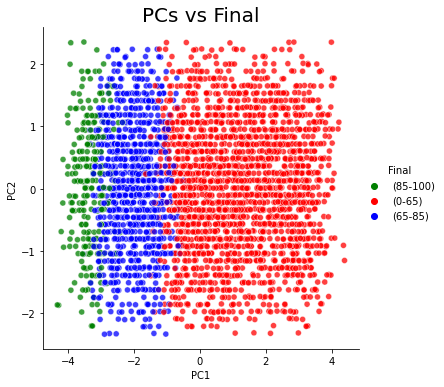

The PCs show good separation, with some overlap. even without using Final as an input


<Figure size 432x288 with 0 Axes>

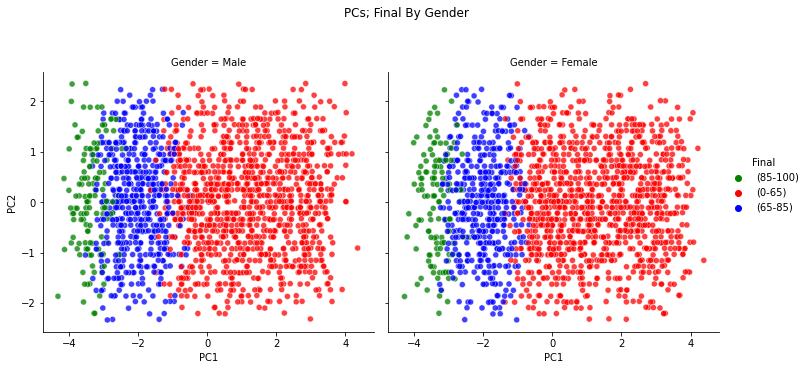

<Figure size 432x288 with 0 Axes>

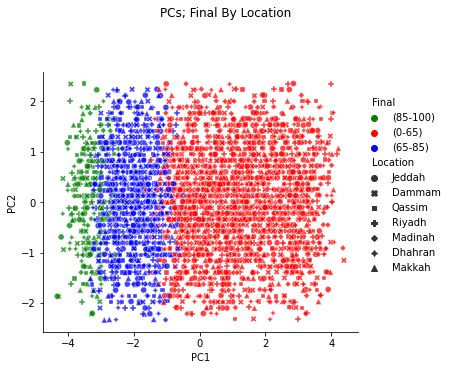

The variance captured by pca 1 is:  61.31%
The variance captured by pca 2 is:  14.33%


,field,coeff
2,Quiz-3,0.0163
1,Quiz-2,0.0151
0,Quiz-1,-0.4213
3,Quiz-4,-0.4227
4,Major-1,-0.4626
6,Major-3,-0.4628
5,Major-2,-0.4638


In [17]:
#A-6: Principal Component Analysis 
pca_input_columns=selected_columns.drop(['Final']) # only numerical and without the output (Final)
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[pca_input_columns]) 
df['PC1'] = principalComponents[:,0] 
df['PC2'] = principalComponents[:,1] 
# #-----
# Draw the PCAs using the normalized values, but use the original data to differentiate (coloring legends) 
df_copy = pd.read_csv('StudentScoresDataA.csv', delimiter =',') #keeping a copy of the original dataframe to set the legends
custom_hue = df_copy['Final'].apply(lambda x: "(85-100)" if x>=85 else ("(65-85)" if x>=65 and x<85
                                   else "(0-65)"))
plt.figure()
sns.relplot(x='PC1',y='PC2',
            hue = custom_hue, palette=['g','r','b'],
            kind='scatter',alpha=0.75,
            height=5, aspect=1, 
            data=df)
plt.title('PCs vs Final', fontsize = 20)
plt.show()
print(f'The PCs show good separation, with some overlap. even without using Final as an input')
# By Gender:
plt.figure()
Gender = sns.relplot(x='PC1',y='PC2',
            hue = custom_hue, palette=['g','r','b'], 
            col = "Gender",
            kind='scatter',alpha=0.75,
            height=5, aspect=1, 
            data=df)
Gender.fig.suptitle('PCs; Final By Gender') 
Gender.fig.subplots_adjust(top = 0.8)
plt.show()
# By Location:
plt.figure()
Location = sns.relplot(x='PC1',y='PC2', 
            hue = custom_hue, palette=['g','r','b'], 
            style = "Location", 
            kind='scatter',alpha=0.75,
            height=5, aspect=1, 
            data=df)
Location.fig.suptitle('PCs; Final By Location') 
Location.fig.subplots_adjust(top = 0.8)
plt.show()
#----   
# How much variation do each principal component capture?
for ind,var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')
#What are the coeffcients (the u vector) of the linear combination of input variables for the first PC?
pca_1_coefficients=np.round(pca.components_[0],4)
zipList=list(zip(pca_input_columns,pca_1_coefficients))
# create new dataframe >> this is just to display it as a dataframe
ndf=pd.DataFrame.from_records(zipList,columns=['field','coeff']) # give new columns and display in df for visula
display(ndf.sort_values(by=['coeff'], ascending=False)) 

# Problem #B

In [18]:
#B-1: Understand the Given Data:
import pandas as pd
import numpy as np
df = pd.read_csv('StudentScoresDataB.csv', delimiter =',')
display(df)


# Count the number of rows and columns in the data
print(f'The number of rows are {len(df.index)}, and the number of columns are {len(df.columns)}')
# Count the number of non-null rows for each column
print(f'The number of non-null rows for each column are:\n{df.count()}')
null =df.columns[df.isna().any()]
print(f'The columns containing missing data are:\n{null}') # No columns containing missing data
display(df.describe())# only numerical

,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
0,21,5,14,20,84,82,92,86
1,13,21,10,10,40,41,44,38
2,4,7,24,7,27,22,25,20
3,22,7,19,14,81,92,93,84
4,8,6,17,9,30,39,33,36
...,...,...,...,...,...,...,...,...
2894,13,15,11,10,68,60,72,60
2895,9,11,7,6,27,27,28,26
2896,11,13,9,8,55,51,48,49
2897,15,25,21,8,46,46,38,43


The number of rows are 2899, and the number of columns are 8
The number of non-null rows for each column are:
Quiz-1     2899
Quiz-2     2899
Quiz-3     2899
Quiz-4     2899
Major-1    2899
Major-2    2899
Major-3    2899
Final      2899
dtype: int64
The columns containing missing data are:
Index([], dtype='object')


,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
count,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000,2899.000000
mean,12.574681,15.077268,15.058296,12.563298,55.942049,55.930321,55.997240,53.903415
std,5.526165,6.101757,6.115778,5.688581,21.771147,21.761616,21.796679,21.396040
min,0.000000,5.000000,5.000000,0.000000,12.000000,12.000000,12.000000,7.000000
25%,9.000000,10.000000,10.000000,8.000000,37.000000,38.000000,37.000000,36.000000
50%,13.000000,15.000000,15.000000,13.000000,56.000000,56.000000,56.000000,54.000000
75%,17.000000,20.000000,20.000000,17.000000,74.000000,75.000000,74.000000,72.000000
max,25.000000,25.000000,25.000000,25.000000,100.000000,100.000000,100.000000,100.000000


In [19]:
#B-2: Check for Type Consistency
df.info()
print('''As can be seen from the data above and the info below:
Quiz-1 is numerical as it should be.
Quiz-2 is numerical as it should be.
Quiz-3 is numerical as it should be.
Quiz-4 is numerical as it should be. 
Major-1 is numerical as it should be. 
Major-2 is numerical as it should be. 
Major-3 is numerical as it should be. 
Final is numerical as it should be.''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Quiz-1   2899 non-null   int64
 1   Quiz-2   2899 non-null   int64
 2   Quiz-3   2899 non-null   int64
 3   Quiz-4   2899 non-null   int64
 4   Major-1  2899 non-null   int64
 5   Major-2  2899 non-null   int64
 6   Major-3  2899 non-null   int64
 7   Final    2899 non-null   int64
dtypes: int64(8)
memory usage: 181.3 KB
As can be seen from the data above and the info below:
Quiz-1 is numerical as it should be.
Quiz-2 is numerical as it should be.
Quiz-3 is numerical as it should be.
Quiz-4 is numerical as it should be. 
Major-1 is numerical as it should be. 
Major-2 is numerical as it should be. 
Major-3 is numerical as it should be. 
Final is numerical as it should be.


In [20]:
#B-3: Normalization: Normalize the values such that the mean is zero and standard deviation is one
from sklearn.preprocessing import StandardScaler # import
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df),columns=df.columns)
for c in df.columns:
    print(f'The mean and std values for {c} are', abs(np.round(df[c].mean())), ' and ', np.round(df[c].std()))
display(df.describe())# only numerical

The mean and std values for Quiz-1 are 0.0  and  1.0
The mean and std values for Quiz-2 are 0.0  and  1.0
The mean and std values for Quiz-3 are 0.0  and  1.0
The mean and std values for Quiz-4 are 0.0  and  1.0
The mean and std values for Major-1 are 0.0  and  1.0
The mean and std values for Major-2 are 0.0  and  1.0
The mean and std values for Major-3 are 0.0  and  1.0
The mean and std values for Final are 0.0  and  1.0


,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
count,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03,2.899000e+03
mean,2.450993e-18,3.125015e-17,-1.115202e-16,-1.470596e-16,9.803970e-18,-1.470596e-17,3.186290e-17,1.323536e-16
std,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00
min,-2.275873e+00,-1.651821e+00,-1.644931e+00,-2.208893e+00,-2.018710e+00,-2.019055e+00,-2.018878e+00,-2.192532e+00
25%,-6.469762e-01,-8.322430e-01,-8.272322e-01,-8.023240e-01,-8.702030e-01,-8.240846e-01,-8.717162e-01,-8.369074e-01
50%,7.697787e-02,-1.266543e-02,-9.533704e-03,7.678148e-02,2.662286e-03,3.202484e-03,1.266270e-04,4.514933e-03
75%,8.009320e-01,8.069121e-01,8.081648e-01,7.800659e-01,8.295873e-01,8.764500e-01,8.260830e-01,8.459372e-01
max,2.248840e+00,1.626490e+00,1.625863e+00,2.186635e+00,2.024034e+00,2.025460e+00,2.019131e+00,2.154816e+00


In [21]:
#B-4: Cross Normalization: apply the standard scaler fitted from StudentScoresDataB
df2 = pd.read_csv('StudentScoresDataC.csv', delimiter =',')
from sklearn.preprocessing import StandardScaler
df2 = pd.DataFrame(scaler.transform(df2),columns=df.columns)
for c2 in df2.columns:
    print(f'The mean and std values for {c2} are', abs(np.round(df2[c2].mean())), ' and ', np.round(df2[c2].std()))
display(df2.describe())

The mean and std values for Quiz-1 are 0.0  and  1.0
The mean and std values for Quiz-2 are 0.0  and  1.0
The mean and std values for Quiz-3 are 0.0  and  1.0
The mean and std values for Quiz-4 are 0.0  and  1.0
The mean and std values for Major-1 are 0.0  and  1.0
The mean and std values for Major-2 are 0.0  and  1.0
The mean and std values for Major-3 are 0.0  and  1.0
The mean and std values for Final are 0.0  and  1.0


,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Major-1,Major-2,Major-3,Final
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,-0.044798,-0.088552,0.116654,-0.108265,-0.059300,-0.078363,-0.034855,0.013316
std,1.031785,1.034225,0.956155,1.038197,0.999085,1.021849,1.021145,1.075939
min,-2.275873,-1.651821,-1.644931,-2.208893,-2.018710,-1.927134,-2.018878,-2.005549
25%,-0.692223,-0.996158,-0.663692,-0.802324,-0.870203,-0.916005,-0.883188,-0.942085
50%,-0.104011,-0.176581,0.154006,-0.099040,-0.089218,-0.134679,0.000127,0.004515
75%,0.800932,0.806912,0.971704,0.604245,0.737707,0.784529,0.826083,0.951115
max,2.067852,1.626490,1.625863,2.186635,1.886214,1.979500,1.927358,2.154816


In [22]:
#B-5: OLS Regression: The hypothesis is that the quiz and major exam scores are linearly related to final exam score.
import numpy as np
X = df.iloc[:,:-1].values # No need to add a new ones column, since we applied standard scaler
y = df.iloc[:,-1].values
best_beta = np.linalg.inv(X.T @ X) @ X.T @ y 
print('The closed form estimates are:', np.round(best_beta,2).tolist())

The closed form estimates are: [0.1, -0.0, -0.0, 0.22, 0.32, 0.42, 0.0]


In [23]:
#B-6: OLS Regression (Using sklearn)
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(X, y)
best_betas =  np.round(reg1.coef_,2) # beta 1,2,....
best_beta_0 = np.round(reg1.intercept_,2) # beta note
print(f'The estimates using sklearn are :', best_beta_0, best_betas.tolist()) # beta note is 0.0
print(f'It appears to have the same estimates as the OLS closed form (found in B-5 above)')
#-----
X_train = df.iloc[:,:-1].values # the training set is represented by dataB
y_train = df.iloc[:,-1].values
X_test = df2.iloc[:,:-1].values # the testing set is represented by dataC
y_test = df2.iloc[:,-1].values
#--------
#Using the above OLS coeffcient estimates, calculate the MSE for data given in HW5DataC
## OLS (Ordinary Least Squares Linear Regression)
from sklearn.metrics import mean_squared_error
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))

The estimates using sklearn are : 0.0 [0.1, -0.0, -0.0, 0.22, 0.32, 0.42, 0.0]
It appears to have the same estimates as the OLS closed form (found in B-5 above)
The MSE using OLS is: 0.01842862368733385


In [24]:
#B-7: Ridge Regression. It may be possible that the quiz and major exam scores are not really independent. 
# Thus, the coefficients needs regularization (penalization).
## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train) 
y_pred2 = reg2.predict(X_test) 
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred2))

The MSE using OLS is: 0.018428417221315444


In [25]:
#B-8: Lasso Regression. It may be possible that not all the quiz and major exam scores are helpful in predicting final score. 
# Thus, the coefficients needs selection (penalization).
## Lasso
from sklearn.linear_model import LassoCV 
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train) 
y_pred3 = reg3.predict(X_test) 
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))

The MSE using Lasso is: 0.018509010803085785


In [26]:
#B-9: Regression Analysis: Compare and contrast the coefficient estimates
print('The coefficient estimates using OLS Regression are:', np.round(reg1.coef_,3))
print('The coefficient estimates using Ridge Regression are:', np.round(reg2.coef_,3))
print('The coefficient estimates using Lasso Regression are',np.round(reg3.coef_,3))
print()
#As can be seen from the result below, the coefficient estimates are very similar 
best_MSE = min(mean_squared_error(y_test, y_pred1),mean_squared_error(y_test, y_pred2),mean_squared_error(y_test, y_pred3))
print(f'Ridge performs better than OLS and Lasso for this data with minumum MSE of {best_MSE}')

The coefficient estimates using OLS Regression are: [ 0.104 -0.001 -0.002  0.218  0.317  0.421  0.001]
The coefficient estimates using Ridge Regression are: [ 0.104 -0.001 -0.002  0.218  0.317  0.421  0.001]
The coefficient estimates using Lasso Regression are [ 0.104 -0.    -0.001  0.218  0.318  0.421  0.   ]

Ridge performs better than OLS and Lasso for this data with minumum MSE of 0.018428417221315444
